# Tutorial - Time series forecasting

## Introduction

Time series are an ubiquitous type of data in all types of processes. Producing forecasts for them can be highly valuable in domains like retail or industrial manufacture, among many others.

Lightwood supports time series forecasting (both univariate and multivariate inputs), handling many of the pain points commonly associated with setting up a manual time series predictive pipeline. 

In this tutorial, we will train a lightwood predictor and analyze its forecasts for the task of counting sunspots in monthly intervals.

## Load data

Let's begin by loading the dataset and looking at it:

In [5]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/mindsdb/benchmarks/main/benchmarks/datasets/monthly_sunspots/data.csv")
df

Month  Sunspots
0     1749-01      58.0
1     1749-02      62.6
2     1749-03      70.0
3     1749-04      55.7
4     1749-05      85.0
...       ...       ...
2815  1983-08      71.8
2816  1983-09      50.3
2817  1983-10      55.8
2818  1983-11      33.3
2819  1983-12      33.4

[2820 rows x 2 columns]

This is a very simple dataset. It's got a single column that specifies the month in which the measurement was done, and then in the 'Sunspots' column we have the actual quantity we are interested in forecasting. As such, we can characterize this as a univariate time series problem.

## Define the predictive task

We will use Lightwood high level methods to state what we want to predict. As this is a time series task (because we want to leverage the notion of time to predict), we need to specify a set of arguments that will activate Lightwood's time series pipeline:

In [8]:
from lightwood.api.high_level import ProblemDefinition

In [21]:
tss = {'nr_predictions': 6,   # the predictor will learn to forecast what the next semester counts will look like (6 data points at monthly intervals -> 6 months)
       'order_by': ['Month'], # what column is used to order the entire datset
       'window': 12           # how many past values to consider for emitting predictions
      }

pdef = ProblemDefinition.from_dict({'target': 'Sunspots',         # specify the column to forecast
                                    'timeseries_settings': tss    # pass along all time series specific parameters
                                   })

Now, let's do a very simple train-test split, leaving 10% of the data to check the forecasts that our predictor will produce:

In [22]:
cutoff = int(len(df)*0.9)

train = df[:cutoff]
test = df[cutoff:]

print(train.shape, test.shape)

(2538, 2) (282, 2)


## Generate the predictor object

Now, we can generate code for a machine learning model by using our problem definition and the data:

In [23]:
from lightwood.api.high_level import (
    json_ai_from_problem,
    code_from_json_ai,
    predictor_from_code
)

json_ai = json_ai_from_problem(df, problem_definition=pdef)
code = code_from_json_ai(json_ai)
predictor = predictor_from_code(code)

# uncomment this to see the generated code:
# print(code)

INFO:lightwood-46866:Dropping features: []
INFO:lightwood-46866:Analyzing a sample of 2467
INFO:lightwood-46866:from a total population of 2820, this is equivalent to 87.5% of your data.
INFO:lightwood-46866:Using 15 processes to deduct types.
INFO:lightwood-46866:Starting statistical analysis
INFO:lightwood-46866:Finished statistical analysis


## Train

Okay, everything is ready now for our predictor to learn based on the training data we will provide.

Internally, lightwood cleans and reshapes the data, featurizes measurements and timestamps, and comes up with a handful of different models that will be evaluated to keep the one that produces the best forecasts.

Let's train the predictor. This should take a couple of minutes, at most:

In [27]:
predictor.learn(train)

INFO:lightwood-46866:Dropping features: []
INFO:lightwood-46866:Performing statistical analysis on data
INFO:lightwood-46866:Starting statistical analysis
INFO:lightwood-46866:Finished statistical analysis
INFO:lightwood-46866:Cleaning the data
INFO:lightwood-46866:Transforming timeseries data
INFO:lightwood-46866:Using 15 processes to reshape.
INFO:lightwood-46866:Splitting the data into train/test
INFO:lightwood-46866:Preparing the encoders
INFO:lightwood-46866:Encoder prepping dict length of: 1
INFO:lightwood-46866:Done running for: Sunspots
INFO:lightwood-46866:time series encoder epoch [1/100000] average_loss = 0.020042672178201507
INFO:lightwood-46866:time series encoder epoch [2/100000] average_loss = 0.0077215013273975305
INFO:lightwood-46866:time series encoder epoch [3/100000] average_loss = 0.0064399814919421546
INFO:lightwood-46866:time series encoder epoch [4/100000] average_loss = 0.005441865690967493
INFO:lightwood-46866:time series encoder epoch [5/100000] average_loss 

DEBUG:lightwood-46866:Loss @ epoch 15: 0.6205589026212692
DEBUG:lightwood-46866:Loss @ epoch 16: 0.6152833849191666
DEBUG:lightwood-46866:Loss @ epoch 17: 0.6099573820829391
DEBUG:lightwood-46866:Loss @ epoch 18: 0.6046575754880905
DEBUG:lightwood-46866:Loss @ epoch 19: 0.5962131917476654
DEBUG:lightwood-46866:Loss @ epoch 20: 0.5909084677696228
DEBUG:lightwood-46866:Loss @ epoch 21: 0.5856661349534988
DEBUG:lightwood-46866:Loss @ epoch 22: 0.5805662572383881
DEBUG:lightwood-46866:Loss @ epoch 23: 0.575617328286171
DEBUG:lightwood-46866:Loss @ epoch 24: 0.5707968175411224
DEBUG:lightwood-46866:Loss @ epoch 25: 0.5632813721895218
DEBUG:lightwood-46866:Loss @ epoch 26: 0.5587586611509323
DEBUG:lightwood-46866:Loss @ epoch 27: 0.554344117641449
DEBUG:lightwood-46866:Loss @ epoch 28: 0.5499386340379715
DEBUG:lightwood-46866:Loss @ epoch 29: 0.5455891937017441
DEBUG:lightwood-46866:Loss @ epoch 30: 0.5413248538970947
DEBUG:lightwood-46866:Loss @ epoch 31: 0.5345934927463531
DEBUG:lightwood-

INFO:lightwood-46866:Updating lightgbm model with 1 iterations
INFO:lightwood-46866:Model now has a total of 2 weak estimators
INFO:lightwood-46866:Started fitting LGBM model
INFO:lightwood-46866:A single GBM iteration takes 0.1 seconds
INFO:lightwood-46866:Training GBM (<module 'lightgbm' from '/Users/Pato/Work/MindsDB/env/lib/python3.8/site-packages/lightgbm/__init__.py'>) with 1325 iterations given 165.66666666666666 seconds constraint
INFO:lightwood-46866:Lightgbm model contains 1 weak estimators
INFO:lightwood-46866:Updating lightgbm model with 1 iterations
INFO:lightwood-46866:Model now has a total of 2 weak estimators
INFO:lightwood-46866:Started fitting LGBM model
INFO:lightwood-46866:A single GBM iteration takes 0.1 seconds
INFO:lightwood-46866:Training GBM (<module 'lightgbm' from '/Users/Pato/Work/MindsDB/env/lib/python3.8/site-packages/lightgbm/__init__.py'>) with 1325 iterations given 165.66666666666666 seconds constraint
INFO:lightwood-46866:Lightgbm model contains 1 weak

## Predict

Once the predictor has trained, we can use it to generate 6-month forecasts for each of the test set data points:

In [28]:
forecasts = predictor.predict(test)

INFO:lightwood-46866:Dropping features: []
INFO:lightwood-46866:Cleaning the data
INFO:lightwood-46866:Transforming timeseries data
INFO:lightwood-46866:Featurizing the data
/Users/Pato/Work/MindsDB/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
INFO:lightwood-46866:AccStats.explain() has not been implemented, no modifications will be done to the data insights.
INFO:lightwood-46866:GlobalFeatureImportance.explain() has not been implemented, no modifications will be done to the data insights.


Let's check how a single row might look:

In [37]:
forecasts.iloc[[10]]

prediction  truth  \
10  [51.28799878891615, 46.76867159945164, 52.0899...   51.0   

                                          order_Month  \
10  [-272577600.0, -269899200.0, -267220800.0, -26...   

                              confidence  \
10  [0.24, 0.24, 0.24, 0.24, 0.24, 0.24]   

                                                lower  \
10  [30.80746268275371, 26.288135493289204, 31.609...   

                                                upper  anomaly  
10  [71.76853489507859, 67.24920770561408, 72.5704...    False

You'll note that the point `prediction` has associated `lower` and `upper` bounds that are a function of the estimated `confidence` the model has on its own output. Apart from this, `order_Month` yields the timestamps of each prediction, `truth` lets us know what is the one-step-ahead observed value (if it exists at all). Finally, the `anomaly` tag will let you know if the observed value falls outside of the predicted region. 


## Visualizing a forecast

Okay, time series are much easier to appreciate through plots. Let's make one:

NOTE: We will use `matplotlib` to generate a simple plot of these forecasts. If you want to run this notebook locally, you will need to `pip install matplotlib` for the following code to work.

In [38]:
import matplotlib.pyplot as plt

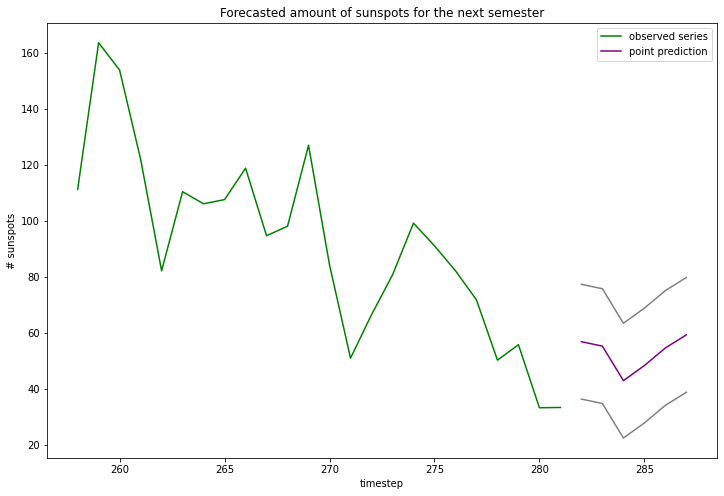

In [69]:
plt.figure(figsize=(12, 8))
plt.plot(forecasts['truth'].iloc[-24:], color='green', label='observed series')
plt.plot([None for _ in range(forecasts.shape[0])] + forecasts.iloc[-1]['prediction'], color='purple', label='point prediction')
plt.plot([None for _ in range(forecasts.shape[0])] + forecasts.iloc[-1]['lower'], color='grey')
plt.plot([None for _ in range(forecasts.shape[0])] + forecasts.iloc[-1]['upper'], color='grey')
plt.xlabel('timestep')
plt.ylabel('# sunspots')
plt.title("Forecasted amount of sunspots for the next semester")
plt.legend()
plt.show()

## Conclusion

In this tutorial, we have gone through how you can train a machine learning model with Lightwood to produce forecasts for a univariate time series task.

There are additional parameters to further customize your timeseries settings and/or prediction insights, so be sure to check the rest of the documentation.